In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
import seaborn as sns

Text(0, 0.5, 'frequency')

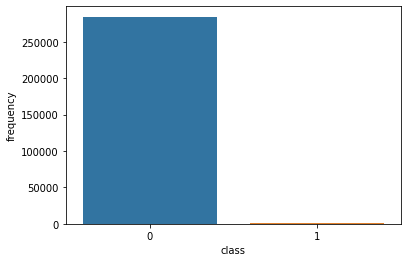

In [6]:
sns.countplot(x='Class',data=df)
plt.xlabel('class')
plt.ylabel('frequency')

In [7]:
## Get the Fraud and the normal dataset 
fraud=df[df['Class']==1]
normal =df[df['Class'] ==0]

In [8]:

print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
df1=df.sample(frac=0.1,random_state=1)
df1.shape

(28481, 31)

In [12]:
fraud=df1[df1['Class']==1]
normal=df1[df1['Class']==0]

In [13]:
print('Fraudlent cases are {}'.format(len(fraud)))
print('Non fraudlent cases are {}'.format(len(normal)))

Fraudlent cases are 49
Non fraudlent cases are 28432


In [ ]:
corrmat=df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True)

In [27]:
X=df1.drop('Class',axis=1)
y=df1['Class']
print(X.shape,y.shape)

(28481, 30) (28481,)


## Here we are doing over sampling to get better accuracy

In [33]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=10)


In [34]:
X_res,y_res=smk.fit_resample(X,y)

In [35]:
X_res.shape,y_res.shape

((55336, 30), (55336,))

In [51]:
# Here we are checking the balancing of dataset
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 28432, 1: 49})
Resampled dataset shape Counter({0: 27668, 1: 27668})


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2)
print(X_train.shape,y_train.shape)

(44268, 30) (44268,)


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model=LogisticRegression()

In [39]:
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
model.score(X_test,y_test)

0.9467835200578244

In [41]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
model.score(X_test,y_test)

0.9999096494398265

In [43]:
y_pred=model.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[5515,    1],
       [   0, 5552]], dtype=int64)